MINIMUM SPINNING TREE
ANALISIS ALGORITMA

- Nama : Hafizh Hilman Asyhari
- NIM  : 202331206
- Kelas : D
- Prodi : S1 Teknik Informatika
- Fakultas : Fakultas Telematika Energi
- Negara : Indonesia 
- Bulan, Tanggal : Juni 2025

In [46]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, display
import pandas as pd
import seaborn as sns
import time

In [4]:
# Variabel dari NIM: 202331206
a, b, c, d, e = 20, 23, 3, 12, 6

edges = [
    ("A", "B", a),
    ("B", "C", b),
    ("A", "D", c),
    ("B", "D", d),
    ("B", "E", abs(d - e)),
    ("C", "E", abs(b - e)),
    ("D", "E", abs(d + b)),
    ("D", "F", e),
    ("E", "F", abs(c + e)),
    ("E", "G", abs(d - e - a)),
    ("F", "G", abs(c - e))
]

pos_fixed = {
    "A": (0, 2),
    "B": (2, 2.5),
    "C": (4, 3),
    "D": (1, 0),
    "E": (3, 1.5),
    "F": (2.5, -1),
    "G": (4, -1.2)
}

G = nx.Graph()
G.add_weighted_edges_from(edges)

In [15]:
def plot_graph_with_highlight(title, edges_highlighted, color, G, pos):
    plt.figure(figsize=(8, 6))
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color="#ffffcc", node_size=1200,
            edge_color='gray', width=1.5, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)
    nx.draw_networkx_edges(G, pos, edgelist=edges_highlighted, edge_color=color, width=3)
    plt.title(title)
    plt.grid(True)
    plt.gca().set_axisbelow(True)
    plt.tight_layout()
    plt.show()

C:\Users\HAFIZ\AppData\Local\Temp\ipykernel_23836\894582908.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


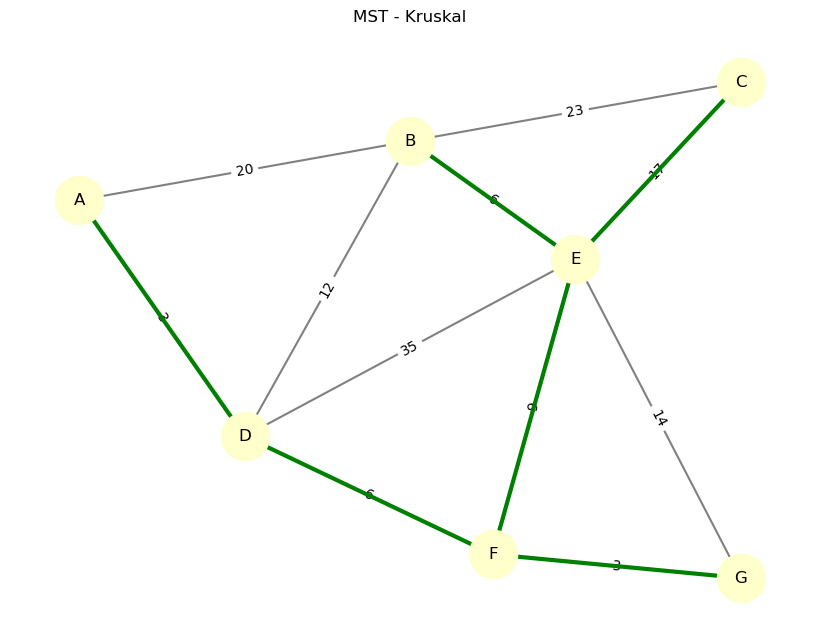

In [6]:
# --- KRUSKAL ---
kruskal_mst = nx.minimum_spanning_tree(G, algorithm="kruskal")
plot_graph_with_highlight("MST - Kruskal", kruskal_mst.edges(), "green", G, pos_fixed)

C:\Users\HAFIZ\AppData\Local\Temp\ipykernel_23836\894582908.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


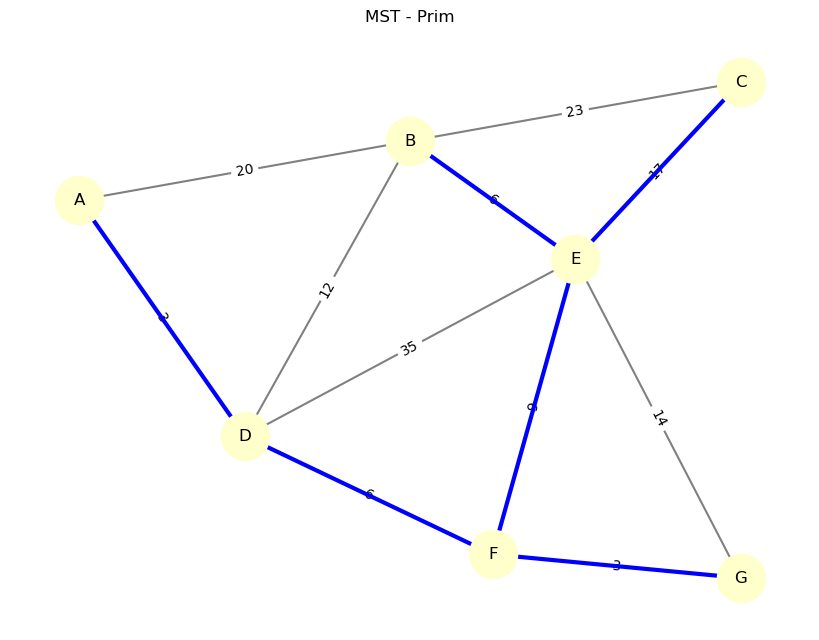

In [7]:
# --- PRIM ---
prim_mst = nx.minimum_spanning_tree(G, algorithm="prim")
plot_graph_with_highlight("MST - Prim", prim_mst.edges(), "blue", G, pos_fixed)

C:\Users\HAFIZ\AppData\Local\Temp\ipykernel_23836\894582908.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


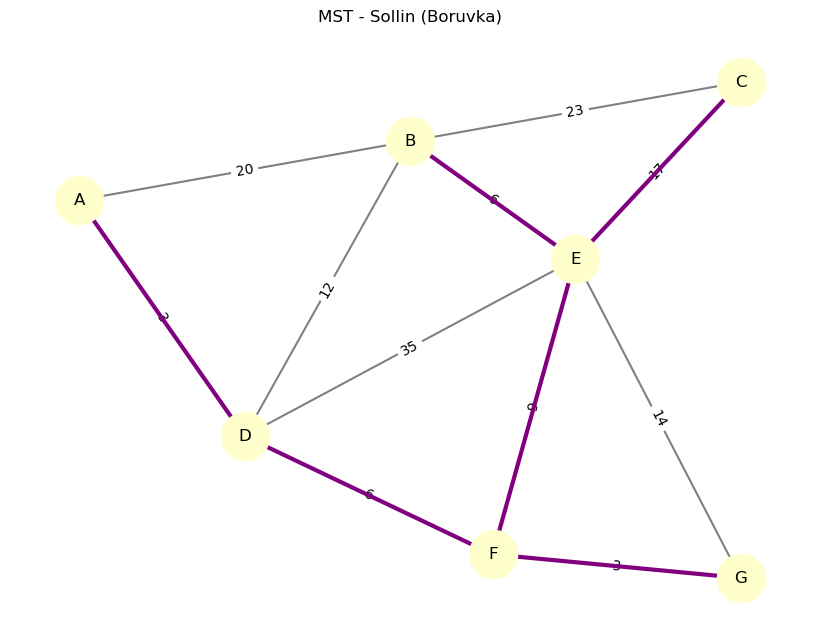

In [8]:
# --- SOLLIN (BORUVKA) ---
parent = {n: n for n in G.nodes()}
rank = {n: 0 for n in G.nodes()}
def find(u):
    while parent[u] != u:
        parent[u] = parent[parent[u]]
        u = parent[u]
    return u
def union(u, v):
    u_root, v_root = find(u), find(v)
    if u_root == v_root: return
    if rank[u_root] < rank[v_root]:
        parent[u_root] = v_root
    else:
        parent[v_root] = u_root
        if rank[u_root] == rank[v_root]:
            rank[u_root] += 1
sollin_edges = []
while len(set(find(n) for n in G.nodes())) > 1:
    cheapest = {}
    for u, v, data in G.edges(data=True):
        ru, rv = find(u), find(v)
        if ru != rv:
            if ru not in cheapest or data['weight'] < G[cheapest[ru][0]][cheapest[ru][1]]['weight']:
                cheapest[ru] = (u, v)
            if rv not in cheapest or data['weight'] < G[cheapest[rv][0]][cheapest[rv][1]]['weight']:
                cheapest[rv] = (u, v)
    for u, v in set(cheapest.values()):
        if find(u) != find(v):
            union(u, v)
            sollin_edges.append((u, v))
plot_graph_with_highlight("MST - Sollin (Boruvka)", sollin_edges, "purple", G, pos_fixed)

C:\Users\HAFIZ\AppData\Local\Temp\ipykernel_23836\894582908.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


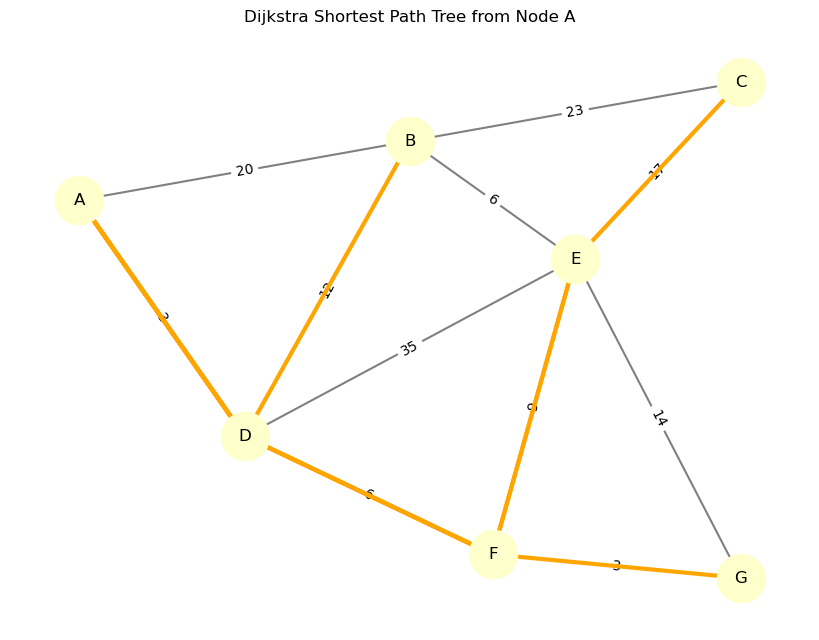

In [9]:
# --- DIJKSTRA ---
dijkstra_path = nx.single_source_dijkstra_path(G, source="A")
dijkstra_edges = []
for dest in dijkstra_path:
    path = dijkstra_path[dest]
    dijkstra_edges += list(zip(path[:-1], path[1:]))
plot_graph_with_highlight("Dijkstra Shortest Path Tree from Node A", dijkstra_edges, "orange", G, pos_fixed)


In [10]:
# --- ANIMASI: Kruskal ---
def animate_mst_building_interactive(G, mst_edges, pos, title="Animasi Proses MST"):
    fig, ax = plt.subplots(figsize=(6, 4))
    labels = nx.get_edge_attributes(G, 'weight')
    def draw_base():
        ax.clear()
        nx.draw_networkx_nodes(G, pos, ax=ax, node_color='lightblue', node_size=800)
        nx.draw_networkx_labels(G, pos, ax=ax)
        nx.draw_networkx_edges(G, pos, ax=ax, edge_color='lightgray', style='dotted')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
        ax.set_title(title)
        ax.grid(True)
        ax.set_axisbelow(True)
    def update(i):
        draw_base()
        nx.draw_networkx_edges(G, pos, edgelist=mst_edges[:i+1], edge_color='green', width=2.5, ax=ax)
        ax.set_title(f"{title} - Edge ke-{i+1} / {len(mst_edges)}")
        return ax,
    ani = animation.FuncAnimation(fig, update, frames=len(mst_edges), interval=1000, repeat=False)
    plt.close(fig)
    return HTML(ani.to_jshtml())

# MST Kruskal Animation
edges_kruskal = [(u, v) for u, v, _ in nx.minimum_spanning_edges(G, algorithm='kruskal', data=True)]
animate_mst_building_interactive(G, edges_kruskal, pos_fixed, title="MST Kruskal - Animasi")

In [11]:
# --- ANIMASI: MST Prim ---
def animate_prim_mst(G, pos, title="Animasi MST - Prim"):
    # Buat MST dengan algoritma Prim dan simpan urutan edge-nya
    mst_prim = list(nx.minimum_spanning_edges(G, algorithm='prim', data=True))
    edges_prim = [(u, v) for u, v, w in mst_prim]

    fig, ax = plt.subplots(figsize=(6, 4))
    labels = nx.get_edge_attributes(G, 'weight')

    def draw_base():
        ax.clear()
        nx.draw_networkx_nodes(G, pos, ax=ax, node_color='lightyellow', node_size=800)
        nx.draw_networkx_labels(G, pos, ax=ax)
        nx.draw_networkx_edges(G, pos, ax=ax, edge_color='lightgray', style='dotted')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
        ax.set_title(title)
        ax.grid(True)
        ax.set_axisbelow(True)

    def update(i):
        draw_base()
        nx.draw_networkx_edges(G, pos, edgelist=edges_prim[:i+1], edge_color='blue', width=3, ax=ax)
        ax.set_title(f"{title} - Edge ke-{i+1} / {len(edges_prim)}")
        return ax,

    ani = animation.FuncAnimation(fig, update, frames=len(edges_prim), interval=1000, repeat=False)
    plt.close(fig)
    return HTML(ani.to_jshtml())

# Panggil animasinya
animate_prim_mst(G, pos_fixed, title="MST Prim - Animasi")


In [12]:
# --- ANIMASI: Dijkstra dari simpul A ---
def animate_dijkstra(G, pos, source="A", title="Animasi Dijkstra dari A"):
    # Ambil path Dijkstra ke semua node
    dijkstra_paths = nx.single_source_dijkstra_path(G, source=source)
    
    # Kumpulkan semua edge dari semua jalur
    dijkstra_edges = []
    for dest in dijkstra_paths:
        path = dijkstra_paths[dest]
        dijkstra_edges.extend(list(zip(path[:-1], path[1:])))
    
    # Hilangkan duplikat
    dijkstra_edges = list(dict.fromkeys(dijkstra_edges))

    fig, ax = plt.subplots(figsize=(6, 4))
    labels = nx.get_edge_attributes(G, 'weight')

    def draw_base():
        ax.clear()
        nx.draw_networkx_nodes(G, pos, ax=ax, node_color='lightgray', node_size=800)
        nx.draw_networkx_labels(G, pos, ax=ax)
        nx.draw_networkx_edges(G, pos, ax=ax, edge_color='lightgray', style='dotted')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
        ax.grid(True)
        ax.set_axisbelow(True)

    def update(i):
        draw_base()
        nx.draw_networkx_edges(G, pos, edgelist=dijkstra_edges[:i+1], edge_color='orange', width=3, ax=ax)
        ax.set_title(f"{title} - Edge ke-{i+1} / {len(dijkstra_edges)}")
        return ax,

    ani = animation.FuncAnimation(fig, update, frames=len(dijkstra_edges), interval=1000, repeat=False)
    plt.close(fig)
    return HTML(ani.to_jshtml())

# Panggil animasinya
animate_dijkstra(G, pos_fixed, source="A", title="Animasi Dijkstra dari Node A")


In [13]:
# --- ANIMASI: MST Sollin (Boruvka) ---
def animate_sollin(G, pos, title="Animasi MST - Sollin (Boruvka)"):
    # Inisialisasi struktur disjoint set
    parent = {n: n for n in G.nodes()}
    rank = {n: 0 for n in G.nodes()}

    def find(u):
        while parent[u] != u:
            parent[u] = parent[parent[u]]
            u = parent[u]
        return u

    def union(u, v):
        u_root, v_root = find(u), find(v)
        if u_root == v_root: return
        if rank[u_root] < rank[v_root]:
            parent[u_root] = v_root
        else:
            parent[v_root] = u_root
            if rank[u_root] == rank[v_root]:
                rank[u_root] += 1

    sollin_edges = []
    frames = []

    # Proses iteratif mencari MST
    while len(set(find(n) for n in G.nodes())) > 1:
        cheapest = {}
        for u, v, data in G.edges(data=True):
            ru, rv = find(u), find(v)
            if ru != rv:
                if ru not in cheapest or data['weight'] < G[cheapest[ru][0]][cheapest[ru][1]]['weight']:
                    cheapest[ru] = (u, v)
                if rv not in cheapest or data['weight'] < G[cheapest[rv][0]][cheapest[rv][1]]['weight']:
                    cheapest[rv] = (u, v)

        newly_added = []
        for u, v in set(cheapest.values()):
            if find(u) != find(v):
                union(u, v)
                sollin_edges.append((u, v))
                newly_added.append((u, v))
        if newly_added:
            frames.append(sollin_edges.copy())

    # --- Animasi ---
    fig, ax = plt.subplots(figsize=(6, 4))
    labels = nx.get_edge_attributes(G, 'weight')

    def draw_base():
        ax.clear()
        nx.draw_networkx_nodes(G, pos, ax=ax, node_color='lightgreen', node_size=800)
        nx.draw_networkx_labels(G, pos, ax=ax)
        nx.draw_networkx_edges(G, pos, ax=ax, edge_color='lightgray', style='dotted')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
        ax.grid(True)
        ax.set_axisbelow(True)

    def update(i):
        draw_base()
        nx.draw_networkx_edges(G, pos, edgelist=frames[i], edge_color='purple', width=3, ax=ax)
        ax.set_title(f"{title} - Iterasi {i+1} / {len(frames)}")
        return ax,

    ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=1200, repeat=False)
    plt.close(fig)
    return HTML(ani.to_jshtml())

# Jalankan animasi Sollin (Boruvka)
animate_sollin(G, pos_fixed, title="Animasi MST - Sollin (Borůvka)")


## MST VERSI KE 2

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import time
from matplotlib import animation
from IPython.display import HTML

In [17]:
# NIM: 202331206 → variabel:
a, b, c, d, e = 20, 23, 3, 12, 6

# Edge dan bobot
edges = [
    ("A", "B", a),
    ("B", "C", b),
    ("A", "D", c),
    ("B", "D", d),
    ("B", "E", abs(d - e)),
    ("C", "E", abs(b - e)),
    ("D", "E", abs(d + b)),
    ("D", "F", e),
    ("E", "F", abs(c + e)),
    ("E", "G", abs(d - e - a)),
    ("F", "G", abs(c - e))
]

# Posisi layout tetap (manual)
pos = {
    "A": (0, 2),
    "B": (2, 2.5),
    "C": (4, 3),
    "D": (1, 0),
    "E": (3, 1.5),
    "F": (2.5, -1),
    "G": (4, -1.2)
}

In [27]:
# Buat graf
G = nx.Graph()
G.add_weighted_edges_from(edges)

def animate_mst_building_interactive(G, mst_edges, pos, color="green", title="Animasi Proses MST"):
    fig, ax = plt.subplots(figsize=(6, 4))
    labels = nx.get_edge_attributes(G, 'weight')

    def draw_base():
        ax.clear()
        nx.draw_networkx_nodes(G, pos, ax=ax, node_color='lightblue', node_size=800)
        nx.draw_networkx_labels(G, pos, ax=ax)
        nx.draw_networkx_edges(G, pos, ax=ax, edge_color='lightgray', style='dotted')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
        ax.set_title(title)
        ax.set_axisbelow(True)
        ax.grid(True)
        ax.set_xticks(range(-1, 6))
        ax.set_yticks(range(-2, 4))

    def update(i):
        draw_base()
        nx.draw_networkx_edges(G, pos, edgelist=mst_edges[:i+1], edge_color=color, width=2.5, ax=ax)
        ax.set_title(f"{title} - Edge ke-{i+1} / {len(mst_edges)}")
        return ax,

    ani = animation.FuncAnimation(fig, update, frames=len(mst_edges), interval=1000, repeat=True)
    plt.close(fig)
    return HTML(ani.to_jshtml())

In [19]:
# --- KRUSKAL ---
start = time.time()
kruskal_mst = list(nx.minimum_spanning_edges(G, algorithm='kruskal', data=True))
end = time.time()
print("Waktu eksekusi Kruskal:", round(end - start, 6), "detik")
edges_kruskal = [(u, v) for u, v, _ in kruskal_mst]
html_kruskal = animate_mst_building_interactive(G, edges_kruskal, pos, "green", "MST - Kruskal")


Waktu eksekusi Kruskal: 0.0 detik


In [20]:
# --- PRIM ---
start = time.time()
prim_mst = list(nx.minimum_spanning_edges(G, algorithm='prim', data=True))
end = time.time()
print("Waktu eksekusi Prim:", round(end - start, 6), "detik")
edges_prim = [(u, v) for u, v, _ in prim_mst]
html_prim = animate_mst_building_interactive(G, edges_prim, pos, "blue", "MST - Prim")


Waktu eksekusi Prim: 0.0 detik


In [26]:
# --- SOLLIN (Boruvka) ---
start = time.time()
parent = {n: n for n in G.nodes()}
rank = {n: 0 for n in G.nodes()}
def find(u):
    while parent[u] != u:
        parent[u] = parent[parent[u]]
        u = parent[u]
    return u
def union(u, v):
    u_root, v_root = find(u), find(v)
    if u_root == v_root: return
    if rank[u_root] < rank[v_root]:
        parent[u_root] = v_root
    else:
        parent[v_root] = u_root
        if rank[u_root] == rank[v_root]:
            rank[u_root] += 1
sollin_edges = []
while len(set(find(n) for n in G.nodes())) > 1:
    cheapest = {}
    for u, v, data in G.edges(data=True):
        ru, rv = find(u), find(v)
        if ru != rv:
            if ru not in cheapest or data['weight'] < G[cheapest[ru][0]][cheapest[ru][1]]['weight']:
                cheapest[ru] = (u, v)
            if rv not in cheapest or data['weight'] < G[cheapest[rv][0]][cheapest[rv][1]]['weight']:
                cheapest[rv] = (u, v)
    for u, v in set(cheapest.values()):
        if find(u) != find(v):
            union(u, v)
            sollin_edges.append((u, v))
end = time.time()
print("Waktu eksekusi Sollin (Boruvka):", round(end - start, 6), "detik")
html_sollin = animate_mst_building_interactive(G, sollin_edges, pos, "purple", "MST - Sollin")


Waktu eksekusi Sollin (Boruvka): 0.0 detik


In [25]:
# --- DIJKSTRA ---
start = time.time()
dijkstra_path = nx.single_source_dijkstra_path(G, source="A")
dijkstra_edges = []
for dest in dijkstra_path:
    path = dijkstra_path[dest]
    dijkstra_edges += list(zip(path[:-1], path[1:]))
end = time.time()
print("Waktu eksekusi Dijkstra dari A:", round(end - start, 6), "detik")

# Animasi interaktif
html_dijkstra = animate_mst_building_interactive(G, dijkstra_edges, pos, color="orange", title="Dijkstra from A")
html_dijkstra

Waktu eksekusi Dijkstra dari A: 0.0 detik


,Algoritma,Total Bobot,Jumlah Edge,Rata-rata Bobot,Waktu Eksekusi (s)
0,Kruskal,44,6,7.33,0.000000
1,Prim,44,6,7.33,0.000000
2,Sollin,44,6,7.33,0.001007
3,Dijkstra,92,15,6.13,0.001009


C:\Users\HAFIZ\AppData\Local\Temp\ipykernel_23836\1873810247.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_stats, x="Algoritma", y="Total Bobot", palette="Set2")


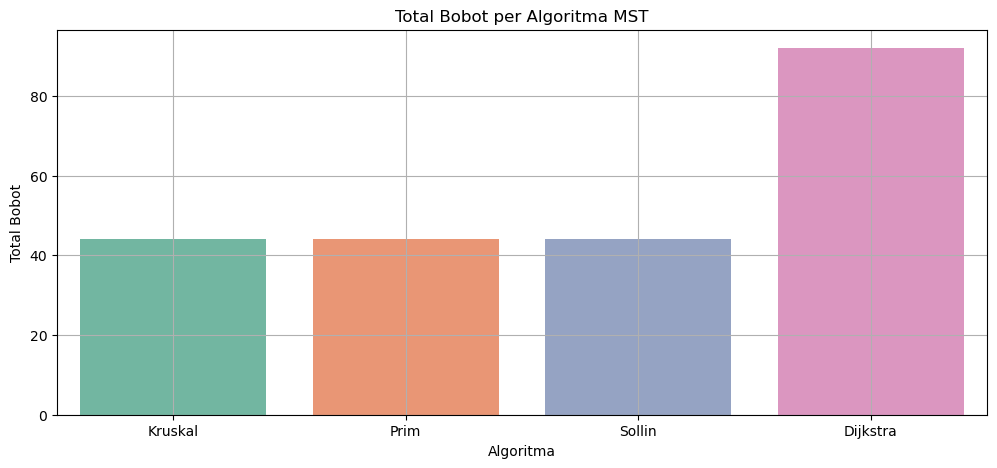

C:\Users\HAFIZ\AppData\Local\Temp\ipykernel_23836\1873810247.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_stats, x="Algoritma", y="Rata-rata Bobot", palette="Set3")


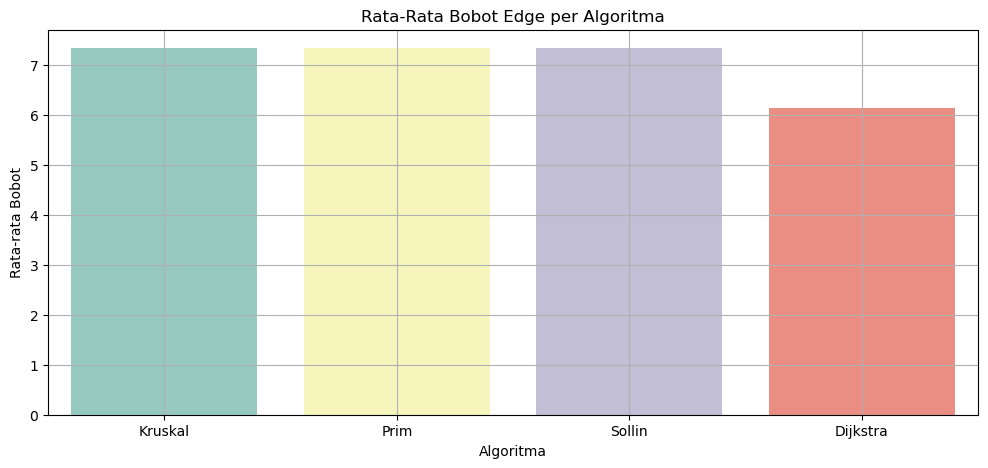

C:\Users\HAFIZ\AppData\Local\Temp\ipykernel_23836\1873810247.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_stats, x="Algoritma", y="Waktu Eksekusi (s)", palette="coolwarm")


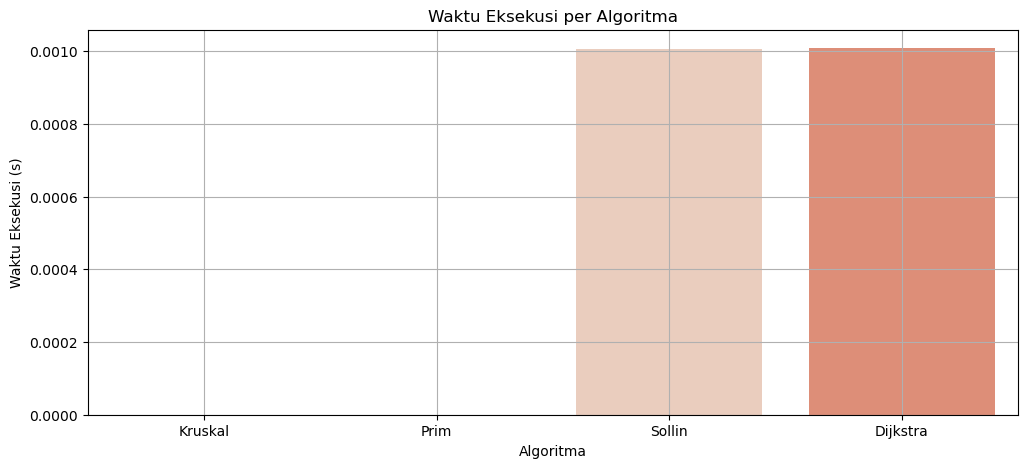

In [28]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- FUNGSI PEMBANTU UNTUK STATISTIK MST ---
def get_mst_stats(name, edges, exec_time):
    total_weight = sum(G[u][v]['weight'] for u, v in edges)
    edge_count = len(edges)
    avg_weight = total_weight / edge_count if edge_count else 0
    return {
        "Algoritma": name,
        "Total Bobot": total_weight,
        "Jumlah Edge": edge_count,
        "Rata-rata Bobot": round(avg_weight, 2),
        "Waktu Eksekusi (s)": round(exec_time, 6)
    }

# --- Hitung dan Simpan Statistik ---

stats = []

# KRUSKAL
start = time.time()
kruskal_mst = nx.minimum_spanning_tree(G, algorithm='kruskal')
kruskal_edges = list(kruskal_mst.edges())
end = time.time()
stats.append(get_mst_stats("Kruskal", kruskal_edges, end - start))

# PRIM
start = time.time()
prim_mst = nx.minimum_spanning_tree(G, algorithm='prim')
prim_edges = list(prim_mst.edges())
end = time.time()
stats.append(get_mst_stats("Prim", prim_edges, end - start))

# SOLLIN
start = time.time()
parent = {n: n for n in G.nodes()}
rank = {n: 0 for n in G.nodes()}
def find(u):
    while parent[u] != u:
        parent[u] = parent[parent[u]]
        u = parent[u]
    return u
def union(u, v):
    u_root, v_root = find(u), find(v)
    if u_root == v_root: return
    if rank[u_root] < rank[v_root]:
        parent[u_root] = v_root
    else:
        parent[v_root] = u_root
        if rank[u_root] == rank[v_root]:
            rank[u_root] += 1
sollin_edges = []
while len(set(find(n) for n in G.nodes())) > 1:
    cheapest = {}
    for u, v, data in G.edges(data=True):
        ru, rv = find(u), find(v)
        if ru != rv:
            if ru not in cheapest or data['weight'] < G[cheapest[ru][0]][cheapest[ru][1]]['weight']:
                cheapest[ru] = (u, v)
            if rv not in cheapest or data['weight'] < G[cheapest[rv][0]][cheapest[rv][1]]['weight']:
                cheapest[rv] = (u, v)
    for u, v in set(cheapest.values()):
        if find(u) != find(v):
            union(u, v)
            sollin_edges.append((u, v))
end = time.time()
stats.append(get_mst_stats("Sollin", sollin_edges, end - start))

# DIJKSTRA
start = time.time()
dijkstra_path = nx.single_source_dijkstra_path(G, source="A")
dijkstra_edges = []
for dest in dijkstra_path:
    path = dijkstra_path[dest]
    dijkstra_edges += list(zip(path[:-1], path[1:]))
end = time.time()
stats.append(get_mst_stats("Dijkstra", dijkstra_edges, end - start))

# --- Buat DataFrame ---
df_stats = pd.DataFrame(stats)
display(df_stats)

# --- Visualisasi Ringkasan ---
plt.figure(figsize=(12, 5))
sns.barplot(data=df_stats, x="Algoritma", y="Total Bobot", palette="Set2")
plt.title("Total Bobot per Algoritma MST")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(data=df_stats, x="Algoritma", y="Rata-rata Bobot", palette="Set3")
plt.title("Rata-Rata Bobot Edge per Algoritma")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(data=df_stats, x="Algoritma", y="Waktu Eksekusi (s)", palette="coolwarm")
plt.title("Waktu Eksekusi per Algoritma")
plt.grid(True)
plt.show()


C:\Users\HAFIZ\AppData\Local\Temp\ipykernel_23836\3485056807.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_stats, x="Algoritma", y="Total Bobot", palette="Set2", ax=ax1)
C:\Users\HAFIZ\AppData\Local\Temp\ipykernel_23836\3485056807.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_stats, x="Algoritma", y="Rata-rata Bobot", palette="Set3", ax=ax2)
C:\Users\HAFIZ\AppData\Local\Temp\ipykernel_23836\3485056807.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_stats, x="Algoritma", y="Waktu Eksekusi (s)", palet

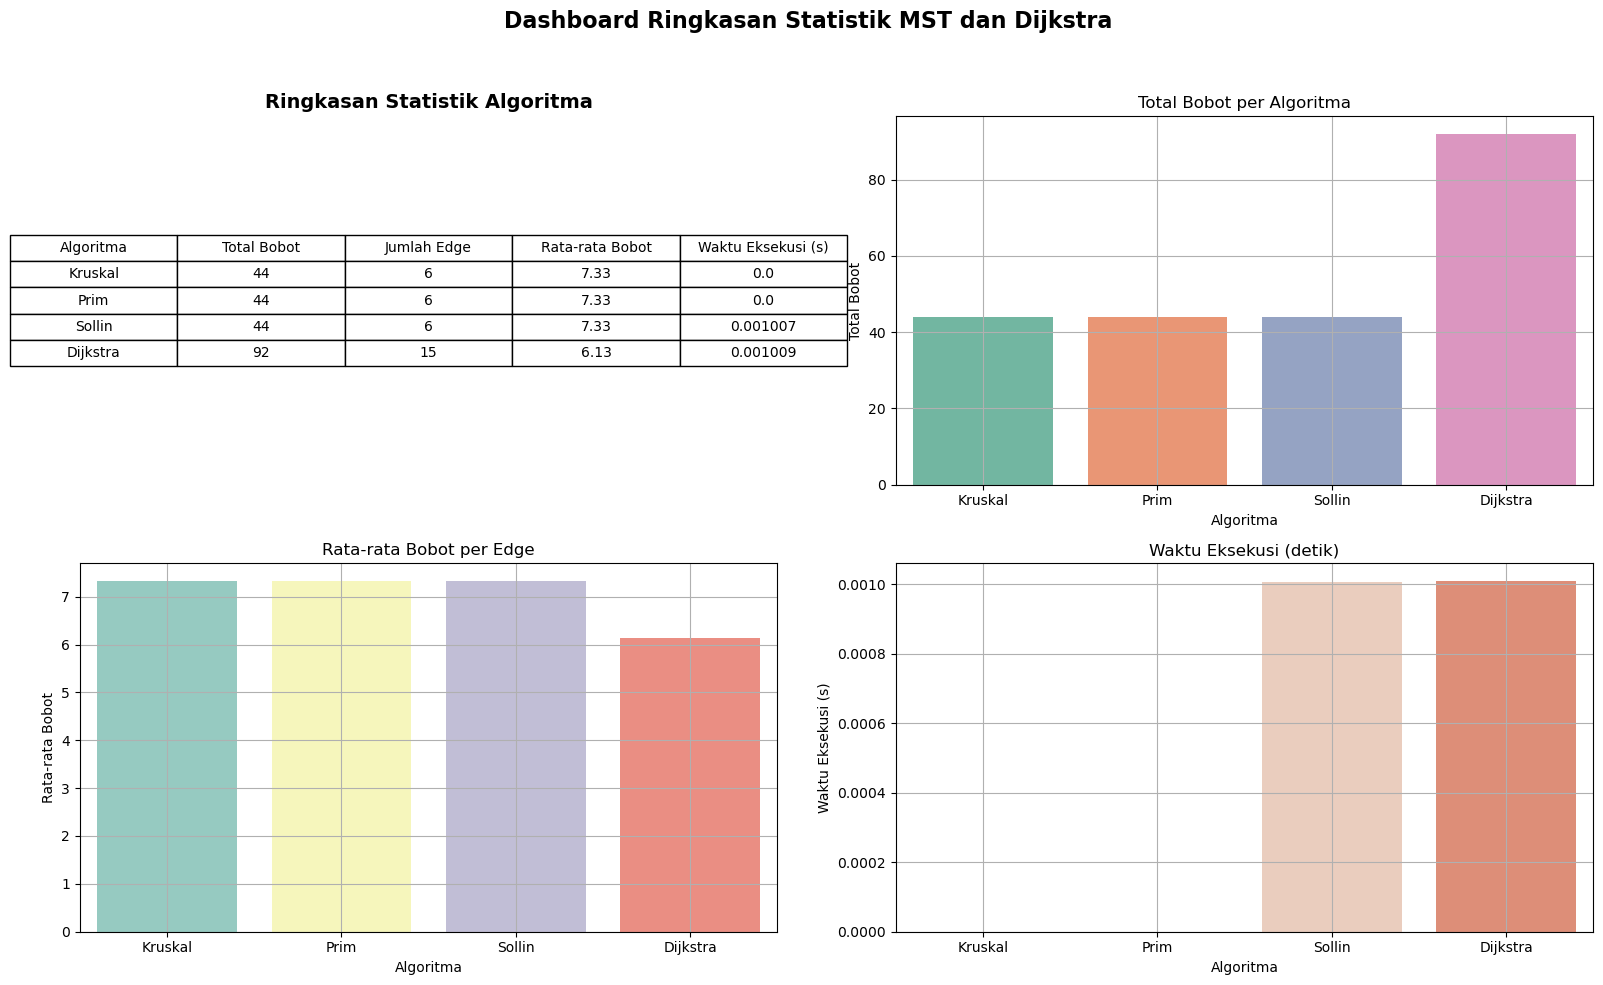

In [32]:
# Convert to DataFrame
df_stats = pd.DataFrame(stats)

# --- Dashboard Visualisasi ---
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2)

# Tabel
ax0 = fig.add_subplot(gs[0, 0])
ax0.axis('off')
table = ax0.table(cellText=df_stats.values,
                  colLabels=df_stats.columns,
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
ax0.set_title("Ringkasan Statistik Algoritma", fontweight='bold', fontsize=14)

# Barplot Total Bobot
ax1 = fig.add_subplot(gs[0, 1])
sns.barplot(data=df_stats, x="Algoritma", y="Total Bobot", palette="Set2", ax=ax1)
ax1.set_title("Total Bobot per Algoritma")
ax1.grid(True)

# Rata-rata Bobot
ax2 = fig.add_subplot(gs[1, 0])
sns.barplot(data=df_stats, x="Algoritma", y="Rata-rata Bobot", palette="Set3", ax=ax2)
ax2.set_title("Rata-rata Bobot per Edge")
ax2.grid(True)

# Waktu Eksekusi
ax3 = fig.add_subplot(gs[1, 1])
sns.barplot(data=df_stats, x="Algoritma", y="Waktu Eksekusi (s)", palette="coolwarm", ax=ax3)
ax3.set_title("Waktu Eksekusi (detik)")
ax3.grid(True)

plt.suptitle("Dashboard Ringkasan Statistik MST dan Dijkstra", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")  # Pertama kali butuh unduh model
doc = nlp("Hello world!")
print([token.text for token in doc])

In [44]:
import nltk
nltk.download('punkt')  # Untuk tokenisasi
print("NLTK siap!")

NLTK siap!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HAFIZ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [45]:
import spacy
nlp = spacy.load("en_core_web_sm")  # Pertama kali butuh unduh model
doc = nlp("Hello world!")
print([token.text for token in doc])


ModuleNotFoundError: No module named 'spacy'